In [2]:
import pyconll
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import json
import os

%load_ext autoreload
%autoreload 2

In [3]:
def draw_experiment(ax, model_name, model_layers, language, task, location, probe, label=None, sharey=None):
#   for language in languages:
  with open(os.path.join(location, language, model_name, task + '_' + probe + '.json')) as fd:
    lng_json = json.load(fd)
    lng_score = [lng_json[str(i + 1)]['te_score'] for i in range(model_layers)]
#       if sharey is not None:
#         ax.plot(lng_score, label=language, sharey=sharey)
#       else:
    ax.plot(lng_score, label=(language if label is None else label))
#   if task == 'sent_len':
#     with open(os.path.join(location, 'he', model_name, 'tokens_cnt' + '_' + probe + '.json')) as fd:
#       lng_json = json.load(fd)
#       lng_score = [lng_json[str(i + 1)]['te_score'] for i in range(model_layers)]
# #       if sharey is not None:
# #         ax.plot(lng_score, label='tokens_he', sharey=sharey)
# #       else:
#       ax.plot(lng_score, label='tokens_he')
  ax.legend()
  ax.set_title(f'Probing {model_name}')
  return ax

In [4]:
def get_scores(model_name, model_layers, language, task, location, probe):
  with open(os.path.join(location, language, model_name, task + '_' + probe + '.json')) as fd:
    lng_json = json.load(fd)
    lng_score = [lng_json[str(i + 1)]['te_score'] for i in range(model_layers)]
    return lng_score

In [5]:
model_labels = {"xlm-roberta-base":"XLM-R", "distilbert-base-multilingual-cased":"distilBERT",
          "facebook/xlm-v-base":"XLM-V", "facebook/mbart-large-50":"mBART-50",
          'avichr/heBERT':"heBERT", 'HeNLP/HeRo':'HeNLP/HeRo'}

In [70]:
tasks_labels = {"sent_len":"SentLen", "tokens_cnt":"TokenCount", 
    "past_present":"Tense", "bigram_shift":"BShift", "subj_number":"SubjNum", "coordination_inversion":"CoordInv"}

In [6]:
markets = ['.', 'v', 'o', 'x', '+', '*']

In [13]:
he_score = [he_res[str(i + 1)]['te_score'] for i in range(12)]
he_score_tok = [he_res_tok[str(i + 1)]['te_score'] for i in range(12)]
ru_score = [ru_res[str(i + 1)]['te_score'] for i in range(12)]
en_score = [en_res[str(i + 1)]['te_score'] for i in range(12)]

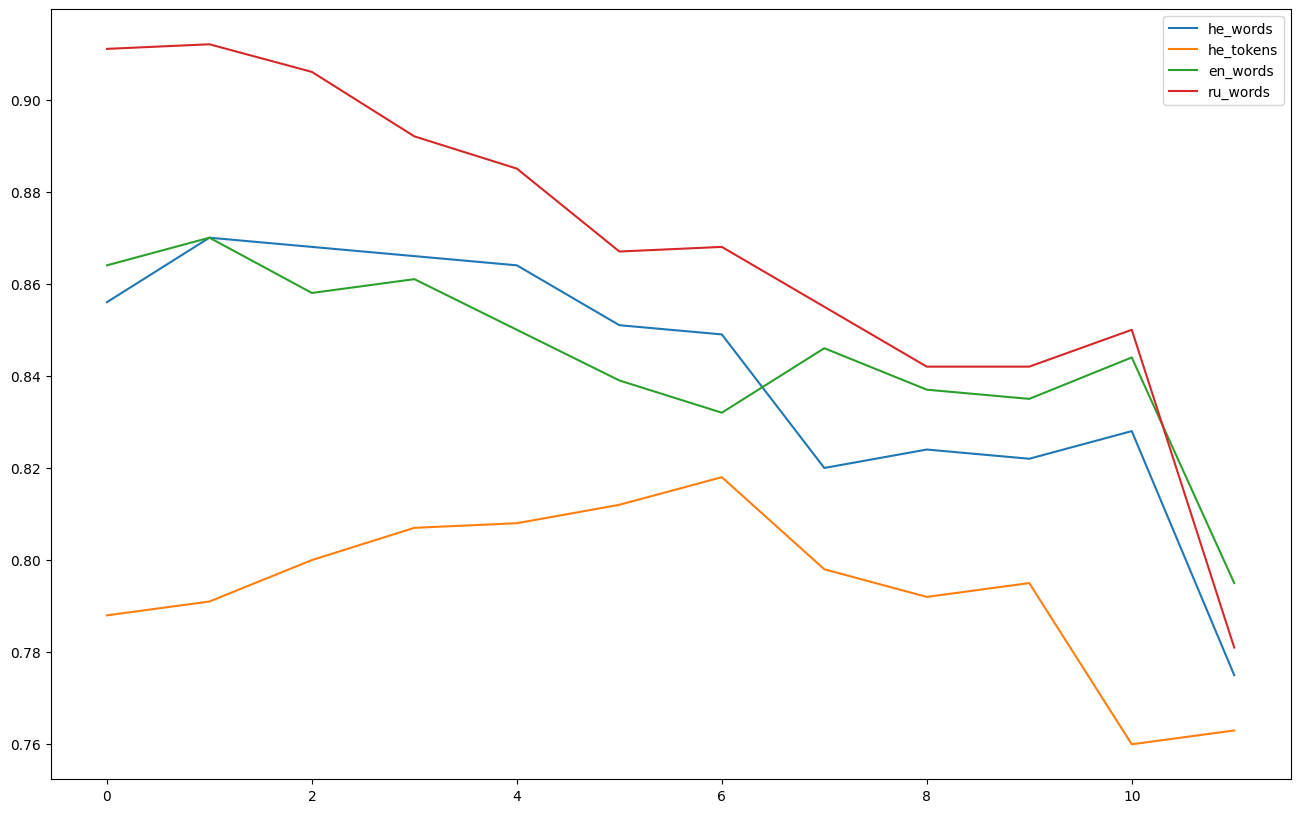

In [14]:
fig = plt.figure(figsize=(16, 10))
plt.plot(he_score, label='he_words')
plt.plot(he_score_tok, label='he_tokens')
plt.plot(en_score, label='en_words')
plt.plot(ru_score, label='ru_words')
plt.legend()
plt.show()

In [37]:
tasks = [
    "sent_len", 
    "past_present", "bigram_shift", "subj_number", "coordination_inversion"]
models = ["xlm-roberta-base", "distilbert-base-multilingual-cased", "facebook/xlm-v-base", "facebook/mbart-large-50"]
models_layers = [12, 6, 12, 12]

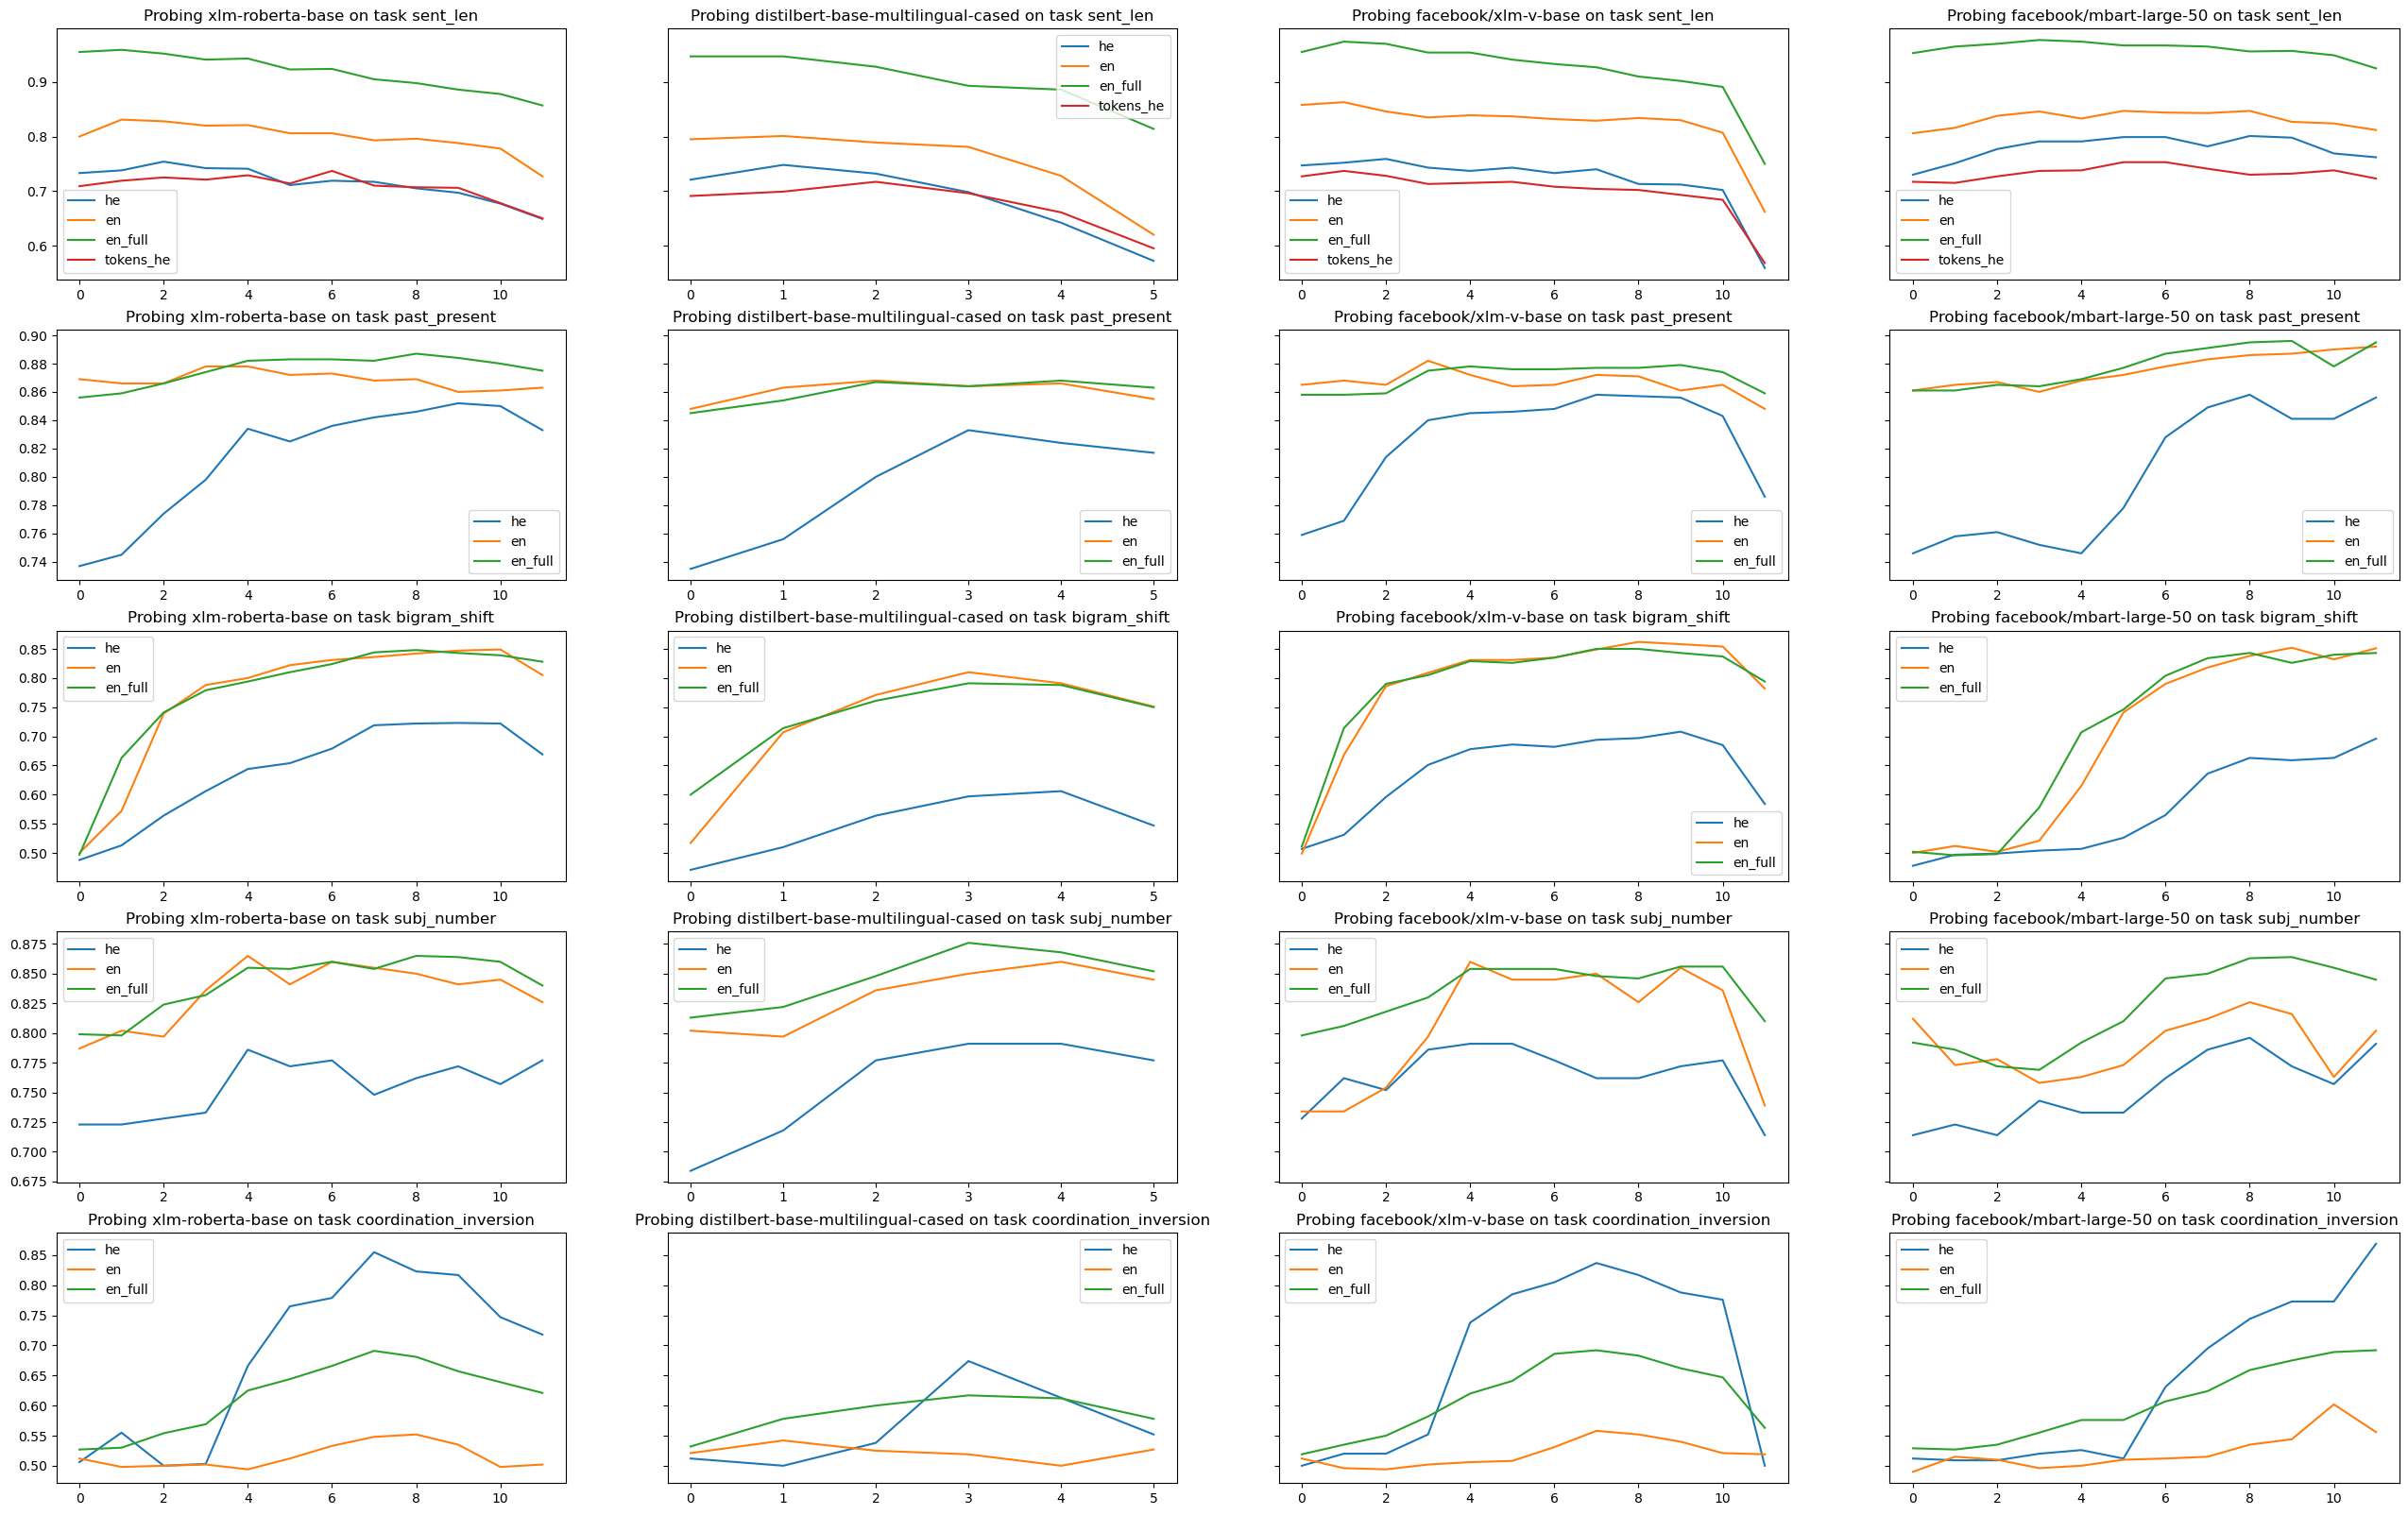

In [47]:
fig, axs = plt.subplots(5, 4, figsize=(32, 20), sharey='row')
for j in range(len(models)):
  model = models[j]
  for i in range(len(tasks)):
    task = tasks[i]
    draw_experiment(axs[i][j], model, models_layers[j], ['he', 'en', 'en_full'], 
                    task, 'results', 'logreg', sharey=axs[i][0] if j != 0 else None)
plt.show()

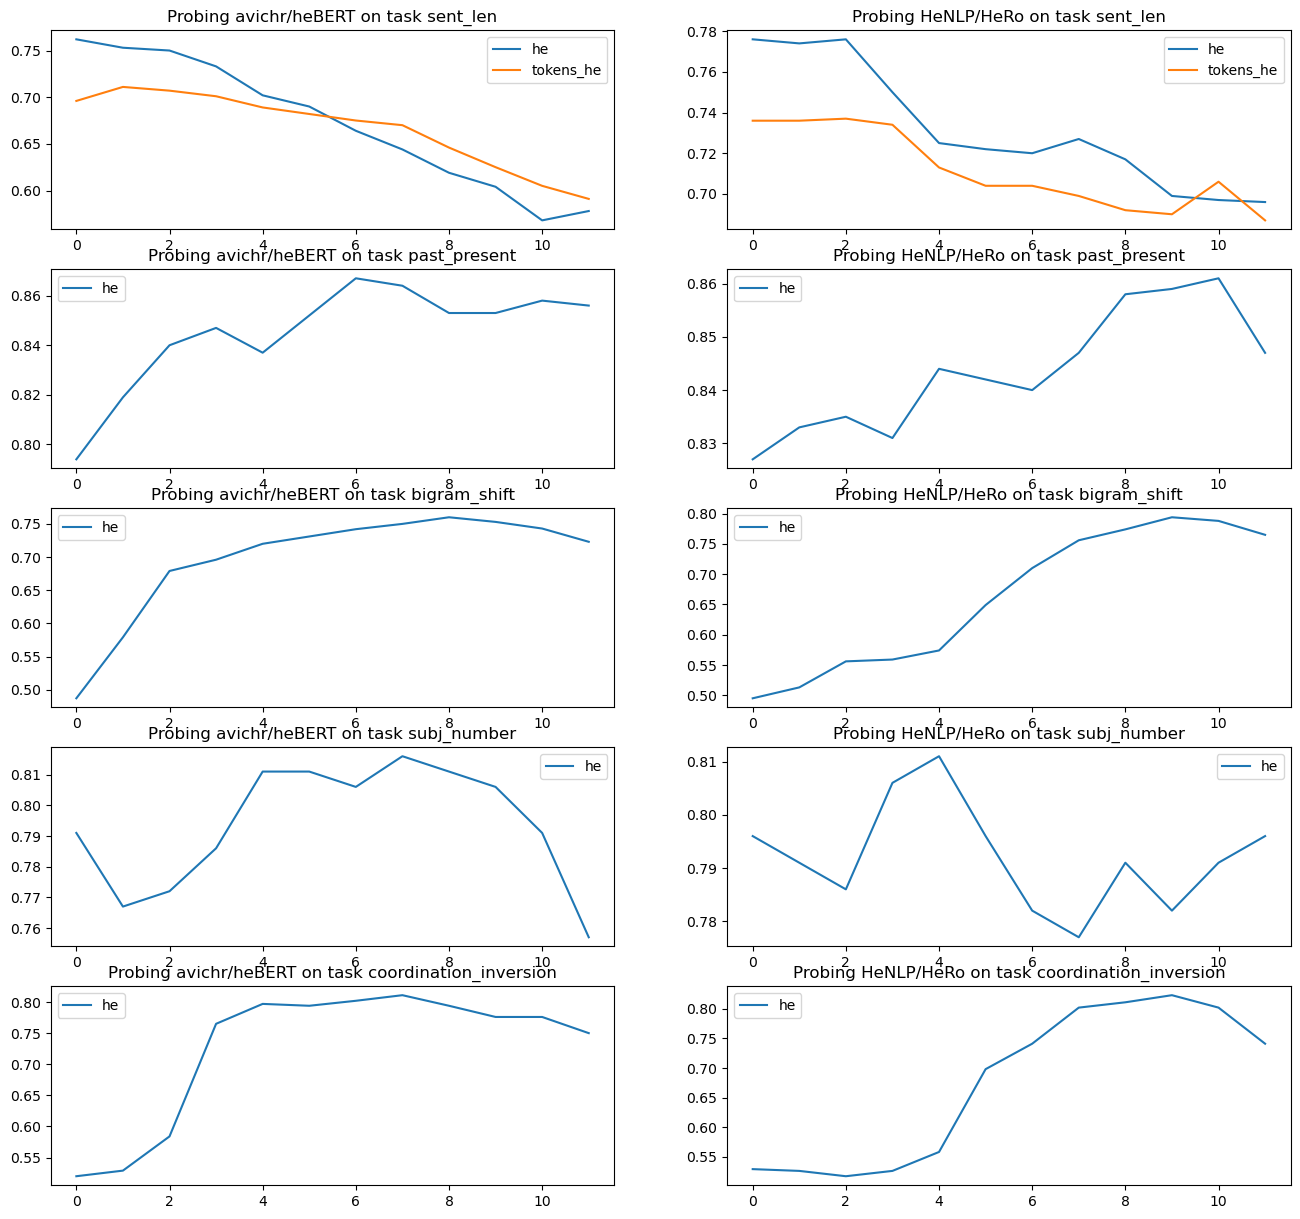

In [31]:
tasks = ["sent_len", "past_present", "bigram_shift", "subj_number", "coordination_inversion"]
models = ['avichr/heBERT', 'HeNLP/HeRo']
models_layers = [12, 12]

fig, axs = plt.subplots(5, 2, figsize=(16, 15))
for i in range(len(models)):
  model = models[i]
  for j in range(len(tasks)):
    task = tasks[j]
    draw_experiment(axs[j][i], model, models_layers[i], ['he'], \\ 
                    task, 'results', 'logreg', sharey=axs[i][0] if j != 0 else None)
plt.show()

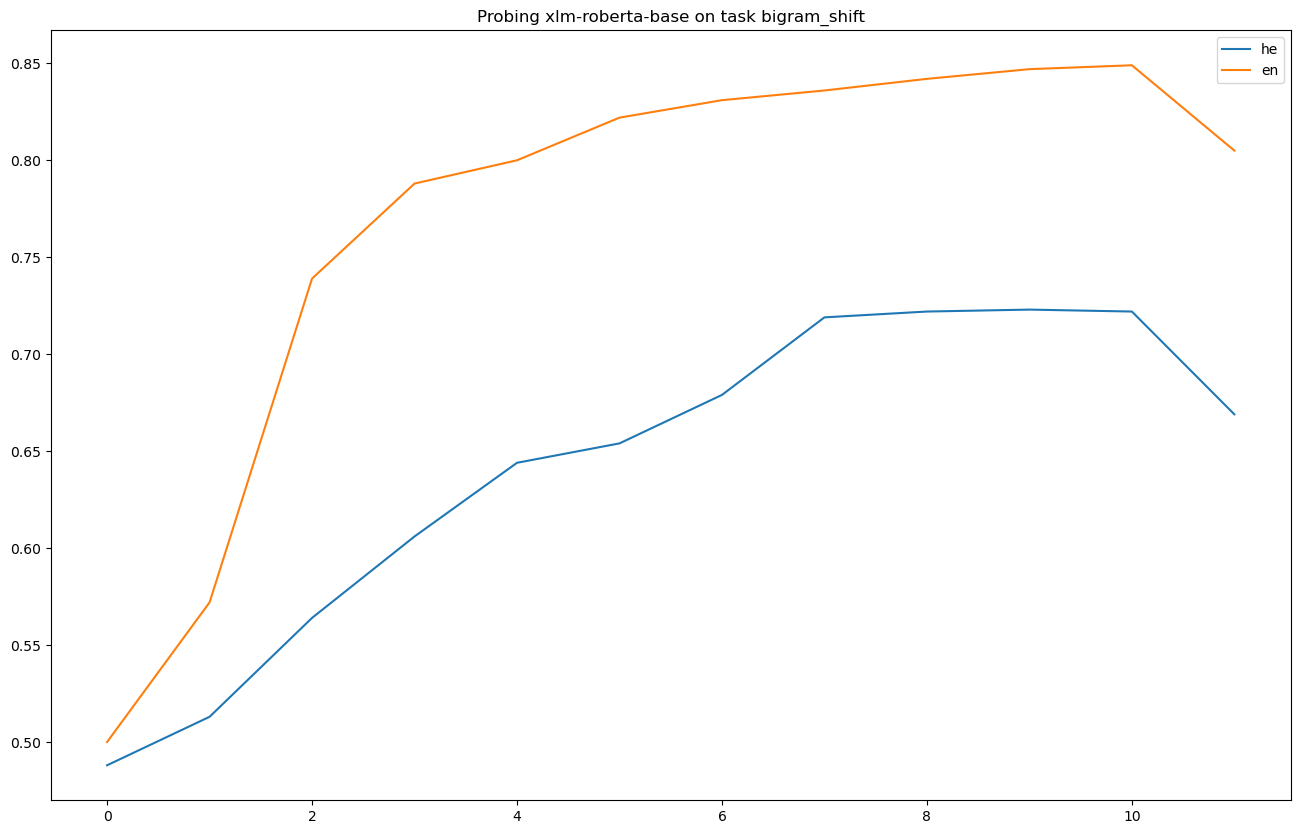

In [18]:
tasks = ['bigram_shift']
models = ['xlm-roberta-base']
models_layers = [12]

fig, axs = plt.subplots(1, 1, figsize=(16, 10))
for i in range(len(models)):
  model = models[i]
  for j in range(len(tasks)):
    task = tasks[j]
    draw_experiment(axs, model, models_layers[i], ['he', 'en'], task, 'results', 'logreg')
plt.show()

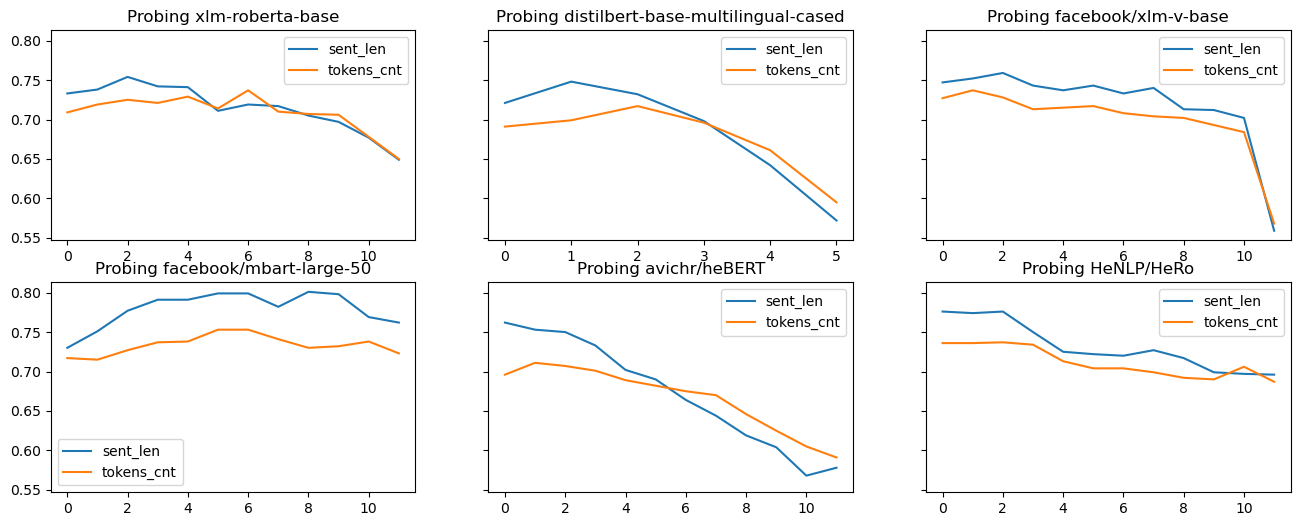

In [16]:
tasks = [
    "sent_len",
    "tokens_cnt"]
models = ["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50",
          'avichr/heBERT', 'HeNLP/HeRo']
models_layers = [12, 6, 12, 12, 12, 12]
fig, axs = plt.subplots(2, 3, figsize=(16, 6), sharey=True)
for i in range(len(models)):
  model = models[i]
  for j in range(len(tasks)):
    task = tasks[j]
    draw_experiment(axs[i // 3][i % 3], model, models_layers[i], 'he', task, 'results', 'logreg', label=task)
plt.show()

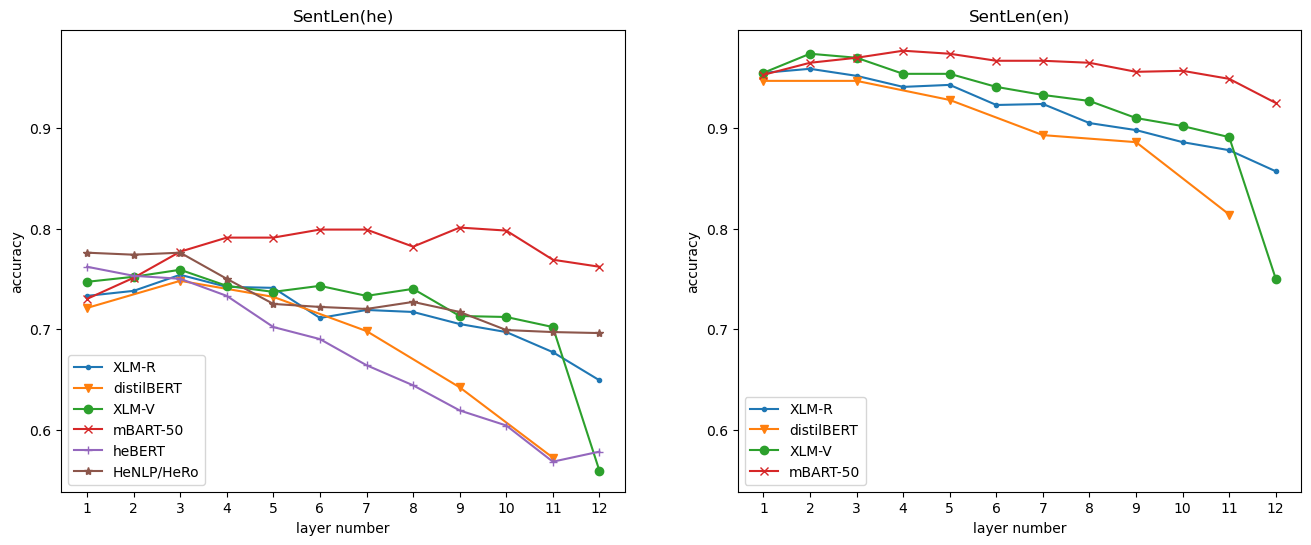

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
tasks = ["sent_len"]
models = [["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50",
          'avichr/heBERT', 'HeNLP/HeRo'],
          ["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50"]]
models_layers = [12, 6, 12, 12, 12, 12]
languages = ['he', 'en_full']
for i in range(2):
  language = languages[i]
  for j in range(len(models[i])):
    model = models[i][j]
    scores = get_scores(model, models_layers[j], language, tasks[0], 
                       'results', 'logreg')
    axs[i].plot(np.arange(1, 13, 12 // models_layers[j]), scores, label=model_labels[model], marker=markets[j])
  axs[i].legend(loc=3)
  axs[i].set_title(f'SentLen({language[:2]})')
  axs[i].set_xlabel('layer number')
  axs[i].xaxis.set_ticks(np.arange(12) + 1)
  axs[i].yaxis.set_tick_params(labelbottom=True)
  axs[i].set_ylabel('accuracy')
plt.show()

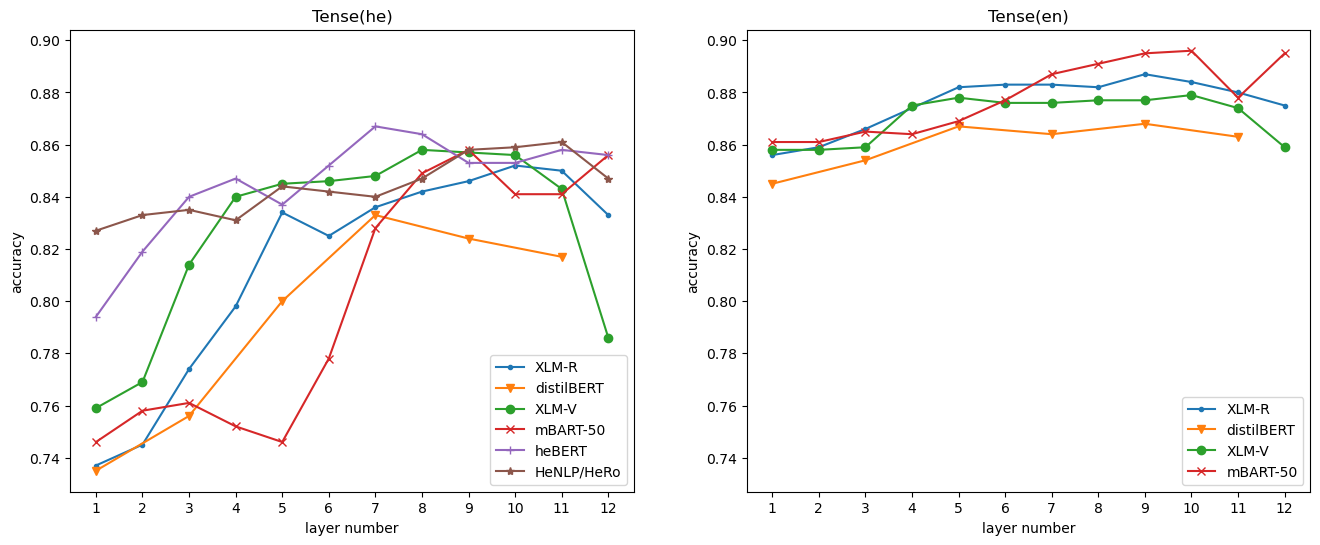

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
tasks = ["past_present"]
models = [["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50",
          'avichr/heBERT', 'HeNLP/HeRo'],
          ["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50"]]
models_layers = [12, 6, 12, 12, 12, 12]
languages = ['he', 'en_full']
for i in range(2):
  language = languages[i]
  for j in range(len(models[i])):
    model = models[i][j]
    scores = get_scores(model, models_layers[j], language, tasks[0], 
                       'results', 'logreg')
    axs[i].plot(np.arange(1, 13, 12 // models_layers[j]), scores, label=model_labels[model], marker=markets[j])
  axs[i].legend(loc=4)
  axs[i].set_title(f'Tense({language[:2]})')
  axs[i].set_xlabel('layer number')
  axs[i].xaxis.set_ticks(np.arange(12) + 1)
  axs[i].yaxis.set_tick_params(labelbottom=True)
  axs[i].set_ylabel('accuracy')
plt.show()

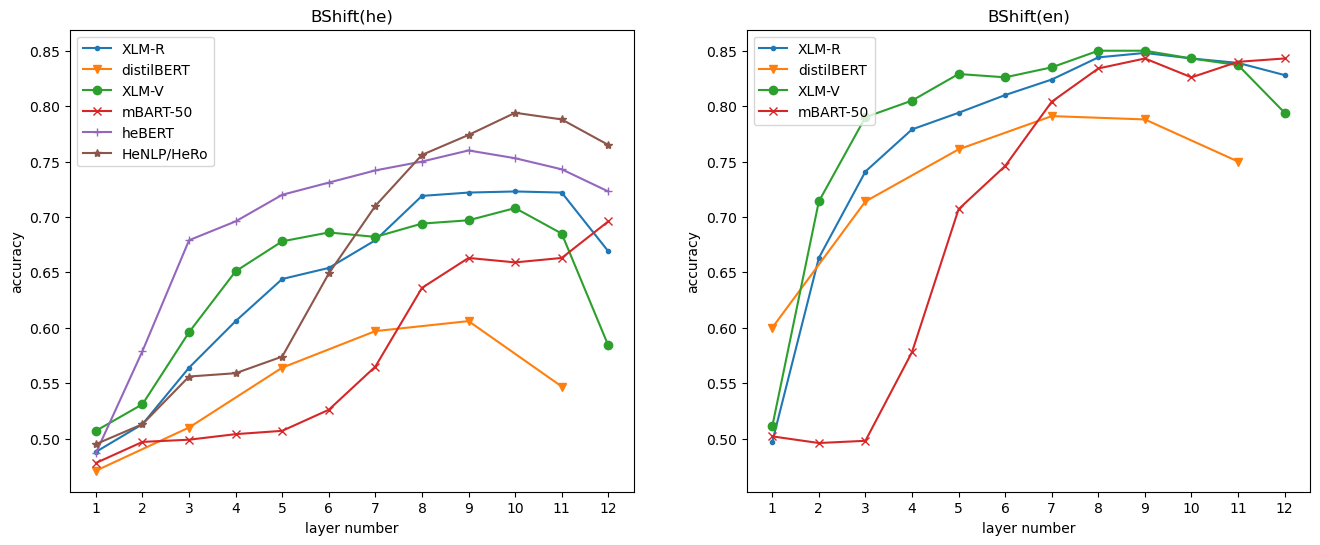

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
tasks = ["bigram_shift"]
models = [["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50",
          'avichr/heBERT', 'HeNLP/HeRo'],
          ["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50"]]
models_layers = [12, 6, 12, 12, 12, 12]
languages = ['he', 'en_full']
for i in range(2):
  language = languages[i]
  for j in range(len(models[i])):
    model = models[i][j]
    scores = get_scores(model, models_layers[j], language, tasks[0], 
                       'results', 'logreg')
    axs[i].plot(np.arange(1, 13, 12 // models_layers[j]), scores, label=model_labels[model], marker=markets[j])
  axs[i].legend(loc=2)
  axs[i].set_title(f'BShift({language[:2]})')
  axs[i].set_xlabel('layer number')
  axs[i].xaxis.set_ticks(np.arange(12) + 1)
  axs[i].yaxis.set_tick_params(labelbottom=True)
  axs[i].set_ylabel('accuracy')
plt.show()

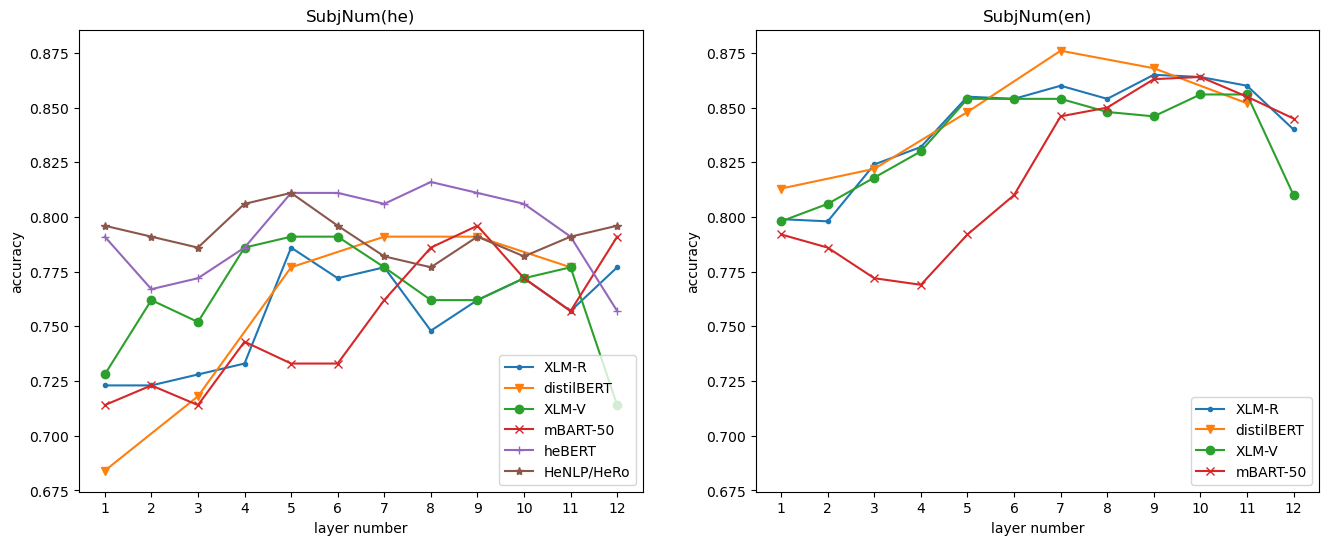

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
tasks = ["subj_number"]
models = [["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50",
          'avichr/heBERT', 'HeNLP/HeRo'],
          ["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50"]]
models_layers = [12, 6, 12, 12, 12, 12]
languages = ['he', 'en_full']
for i in range(2):
  language = languages[i]
  for j in range(len(models[i])):
    model = models[i][j]
    scores = get_scores(model, models_layers[j], language, tasks[0], 
                       'results', 'logreg')
    axs[i].plot(np.arange(1, 13, 12 // models_layers[j]), scores, label=model_labels[model], marker=markets[j])
  axs[i].legend(loc=4)
  axs[i].set_title(f'SubjNum({language[:2]})')
  axs[i].set_xlabel('layer number')
  axs[i].xaxis.set_ticks(np.arange(12) + 1)
  axs[i].yaxis.set_tick_params(labelbottom=True)
  axs[i].set_ylabel('accuracy')
plt.show()

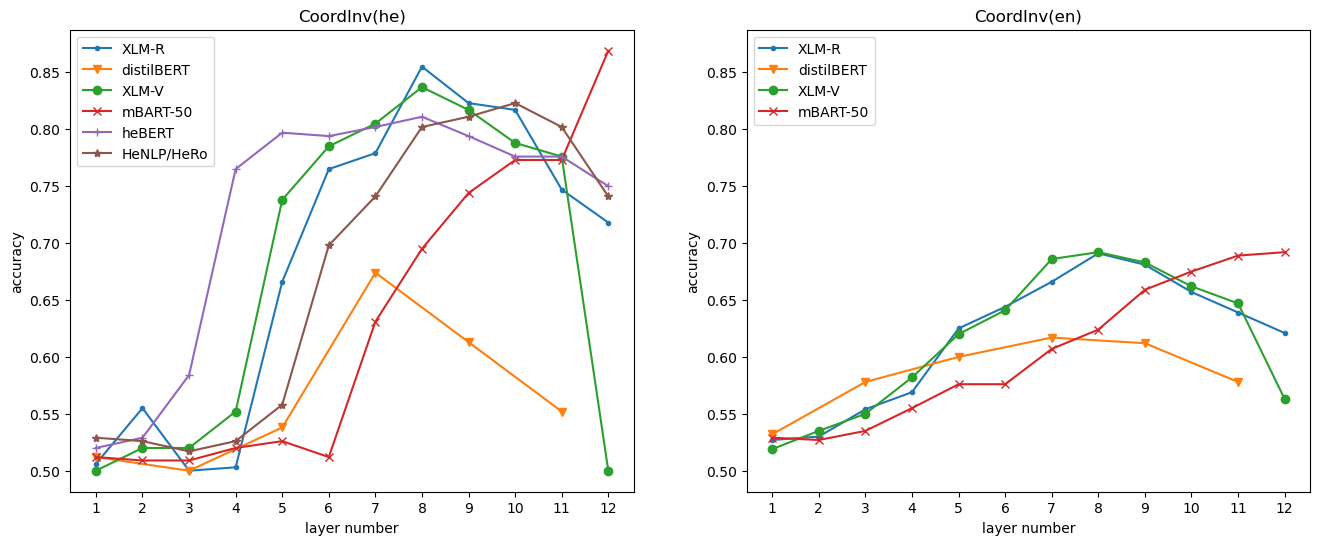

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
tasks = ["coordination_inversion"]
models = [["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50",
          'avichr/heBERT', 'HeNLP/HeRo'],
          ["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50"]]
models_layers = [12, 6, 12, 12, 12, 12]
languages = ['he', 'en_full']
for i in range(2):
  language = languages[i]
  for j in range(len(models[i])):
    model = models[i][j]
    scores = get_scores(model, models_layers[j], language, tasks[0], 
                       'results', 'logreg')
    axs[i].plot(np.arange(1, 13, 12 // models_layers[j]), scores, label=model_labels[model], marker=markets[j])
  axs[i].legend(loc=2)
  axs[i].set_title(f'CoordInv({language[:2]})')
  axs[i].set_xlabel('layer number')
  axs[i].xaxis.set_ticks(np.arange(12) + 1)
  axs[i].yaxis.set_tick_params(labelbottom=True)
  axs[i].set_ylabel('accuracy')
plt.show()

IndexError: list index out of range

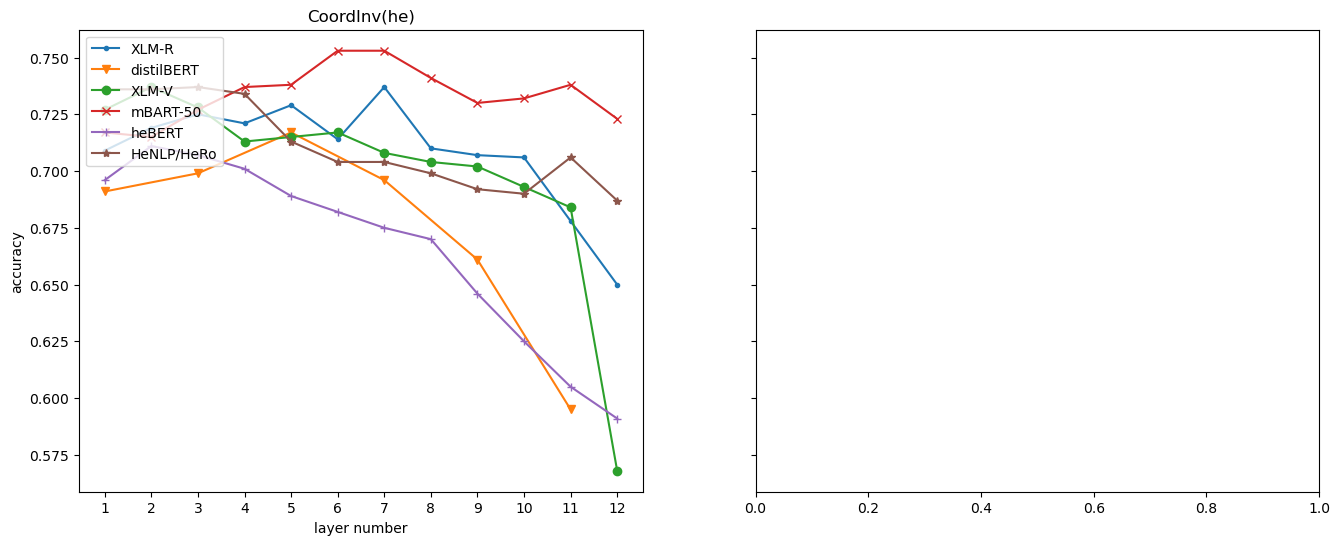

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
tasks = ["tokens_cnt"]
models = [["xlm-roberta-base", "distilbert-base-multilingual-cased",
          "facebook/xlm-v-base", "facebook/mbart-large-50",
          'avichr/heBERT', 'HeNLP/HeRo']]
models_layers = [12, 6, 12, 12, 12, 12]
languages = ['he']
for i in range(2):
  language = languages[i]
  for j in range(len(models[i])):
    model = models[i][j]
    scores = get_scores(model, models_layers[j], language, tasks[0], 
                       'results', 'logreg')
    axs[i].plot(np.arange(1, 13, 12 // models_layers[j]), scores, label=model_labels[model], marker=markets[j])
  axs[i].legend(loc=2)
  axs[i].set_title(f'CoordInv({language[:2]})')
  axs[i].set_xlabel('layer number')
  axs[i].xaxis.set_ticks(np.arange(12) + 1)
  axs[i].yaxis.set_tick_params(labelbottom=True)
  axs[i].set_ylabel('accuracy')
plt.show()

In [71]:
tasks = [
    "sent_len", "tokens_cnt", 
    "past_present", "bigram_shift", "subj_number", "coordination_inversion"]
models = ["xlm-roberta-base", "distilbert-base-multilingual-cased", "facebook/xlm-v-base",
          "facebook/mbart-large-50", 'avichr/heBERT', 'HeNLP/HeRo']
models_layers = [12, 6, 12, 12, 12, 12]


results = pd.DataFrame([['' for j in range(len(models))] for i in range(len(tasks))], 
                       columns=[model_labels[model] for model in models], 
                       index=[tasks_labels[task] for task in tasks])
print(results)
for i in range(len(tasks)):
  language = 'he'
  for j in range(len(models)):
    model = models[j]
    scores = get_scores(model, models_layers[j], language, tasks[i], 
                       'results', 'logreg')
    results[model_labels[model]][tasks_labels[tasks[i]]] = "{:.1f}[{}]".format(max(scores)*100, np.argmax(scores) + 1)

           XLM-R distilBERT XLM-V mBART-50 heBERT HeNLP/HeRo
SentLen                                                     
TokenCount                                                  
Tense                                                       
BShift                                                      
SubjNum                                                     
CoordInv                                                    


In [90]:
# results
inst = results.style
for task in results.index:
  mx = max(results.loc[task, :].values.flatten().tolist())
#   print(mx)
  inst = inst.applymap(lambda x: 'background-color : yellow' if x>=mx else '')
inst

,XLM-R,distilBERT,XLM-V,mBART-50,heBERT,HeNLP/HeRo
SentLen,75.4[3],74.8[2],75.9[3],80.1[9],76.2[1],77.6[1]
TokenCount,73.7[7],71.7[3],73.7[2],75.3[6],71.1[2],73.7[3]
Tense,85.2[10],83.3[4],85.8[8],85.8[9],86.7[7],86.1[11]
BShift,72.3[10],60.6[5],70.8[10],69.6[12],76.0[9],79.4[10]
SubjNum,78.6[5],79.1[4],79.1[5],79.6[9],81.6[8],81.1[5]
CoordInv,85.5[8],67.4[4],83.7[8],86.9[12],81.1[8],82.3[10]


In [92]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
results.style.apply(highlight_max, props='background-color : yellow', axis=1)

,XLM-R,distilBERT,XLM-V,mBART-50,heBERT,HeNLP/HeRo
SentLen,75.4[3],74.8[2],75.9[3],80.1[9],76.2[1],77.6[1]
TokenCount,73.7[7],71.7[3],73.7[2],75.3[6],71.1[2],73.7[3]
Tense,85.2[10],83.3[4],85.8[8],85.8[9],86.7[7],86.1[11]
BShift,72.3[10],60.6[5],70.8[10],69.6[12],76.0[9],79.4[10]
SubjNum,78.6[5],79.1[4],79.1[5],79.6[9],81.6[8],81.1[5]
CoordInv,85.5[8],67.4[4],83.7[8],86.9[12],81.1[8],82.3[10]


In [77]:
results.index

Index(['SentLen', 'TokenCount', 'Tense', 'BShift', 'SubjNum', 'CoordInv'], dtype='object')